# <font color='blue'> K-Nearest Neighbors
## Supervised(Classification, Regression) learning 
## Unsupervised learning

- <font color ='purple'> Instance의 이웃과의 거리를 기준으로 하기 때문에 반드시 표준화가 필요

<img src ='https://images.unsplash.com/photo-1581187254571-b0844d86871a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8N3x8bmVpZ2hib3Job29kfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=800&q=60'>

In [156]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore') 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
from IPython.display import Image
width=800; height=500
dir_path = r'D:\ASSIST\img\aSSIST_20220111_1학기_조상구'

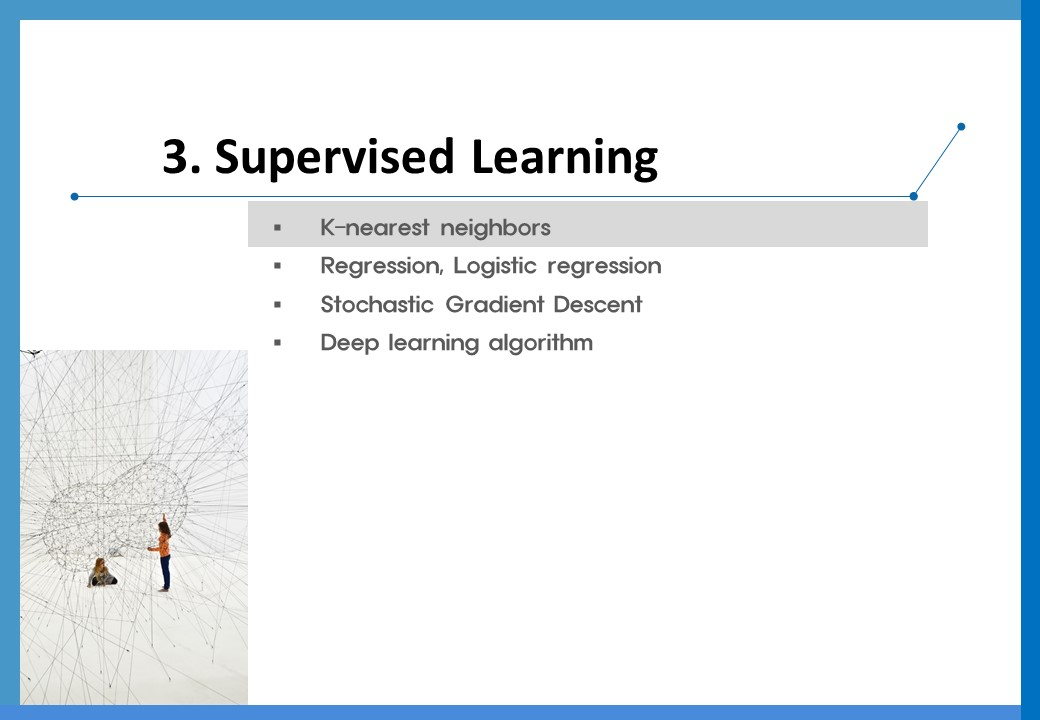

In [ ]:
Image(filename=dir_path + '/슬라이드80.jpg', width=width, height=height)

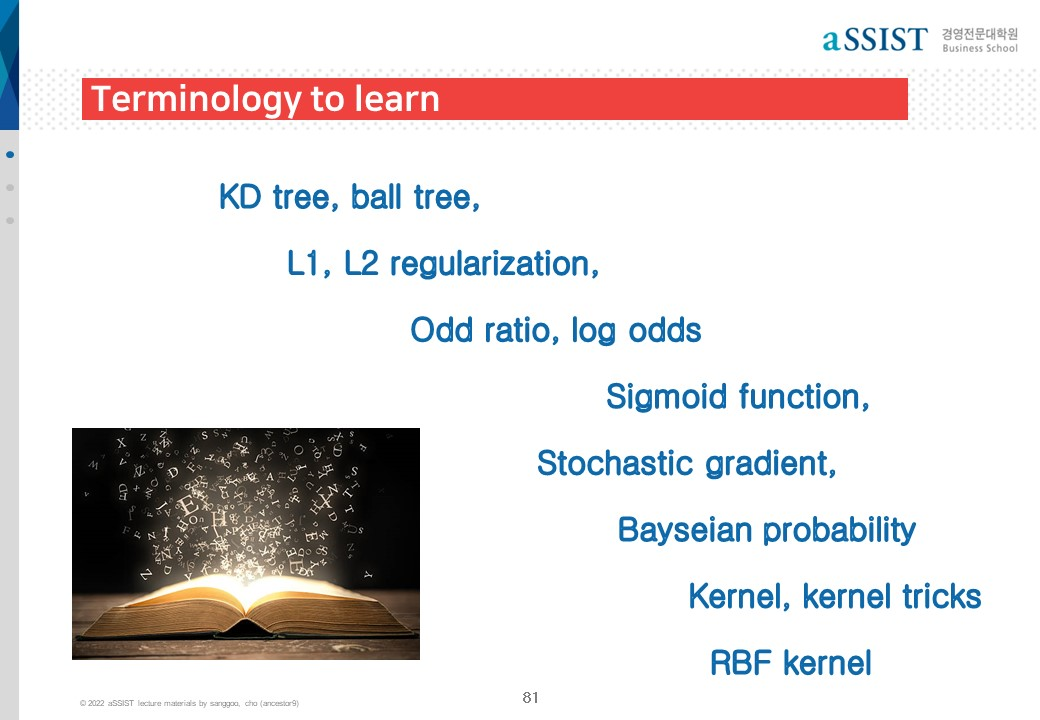

In [ ]:
Image(filename=dir_path + '/슬라이드81.jpg', width=width, height=height)

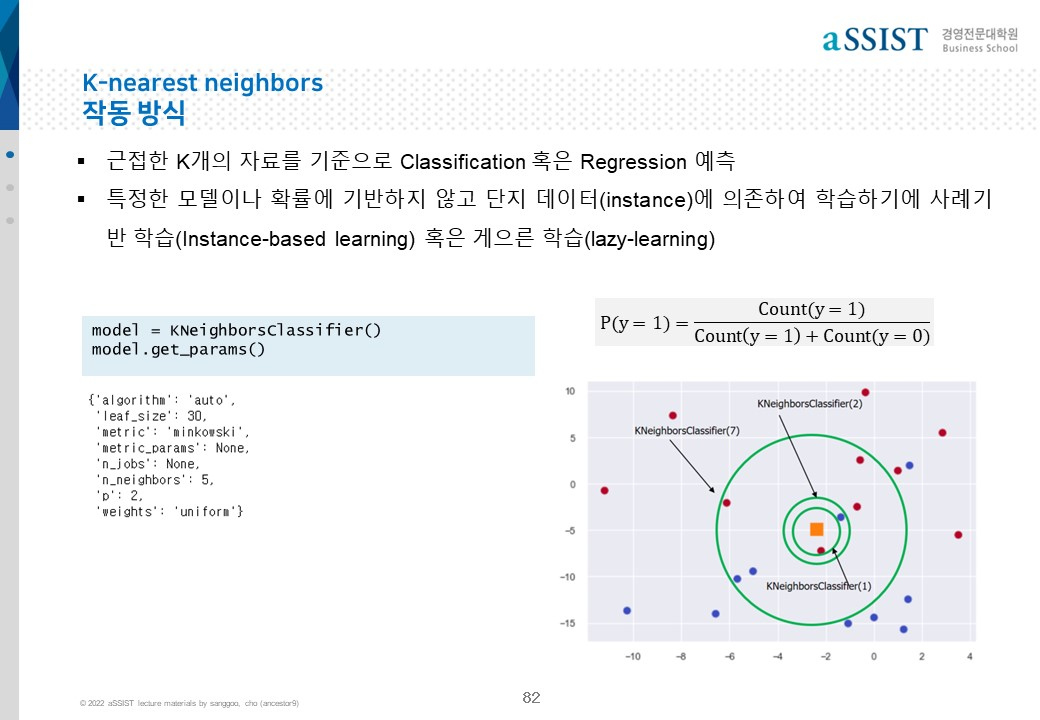

In [ ]:
Image(filename=dir_path + '/슬라이드82.jpg', width=width, height=height)

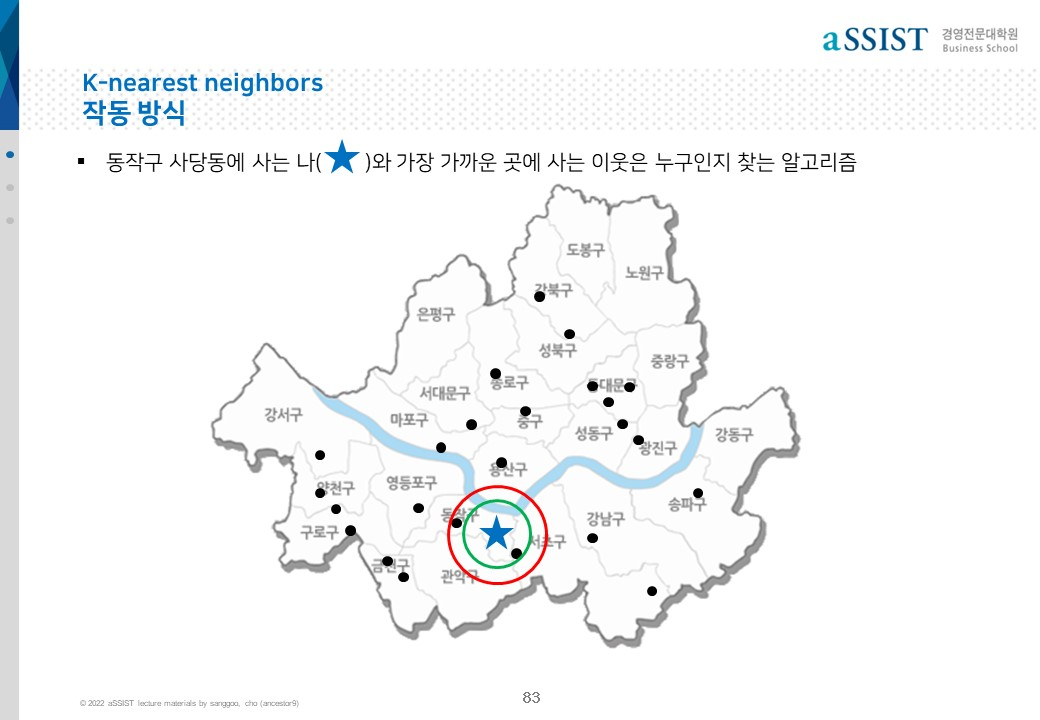

In [ ]:
Image(filename=dir_path + '/슬라이드83.jpg', width=width, height=height)

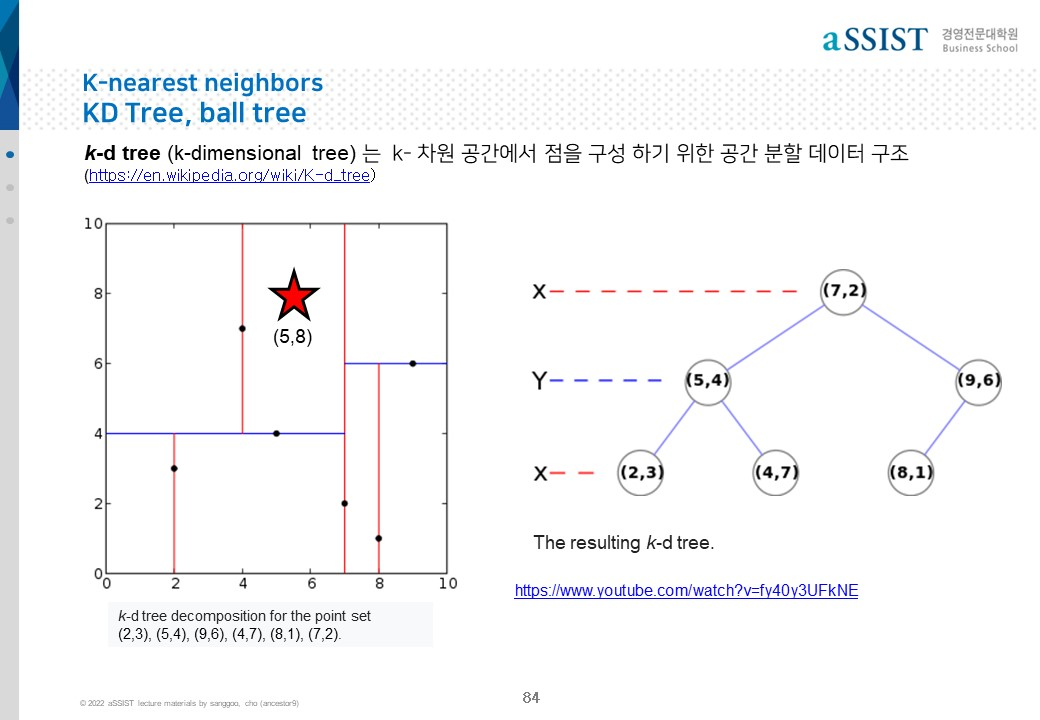

In [ ]:
Image(filename=dir_path + '/슬라이드84.jpg', width=width, height=height)

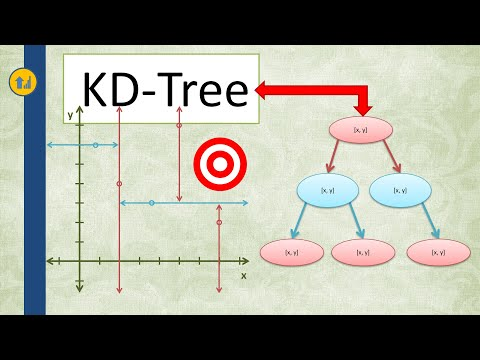

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Glp7THUpGow', height='600', width='1000', start =(4*60+30))

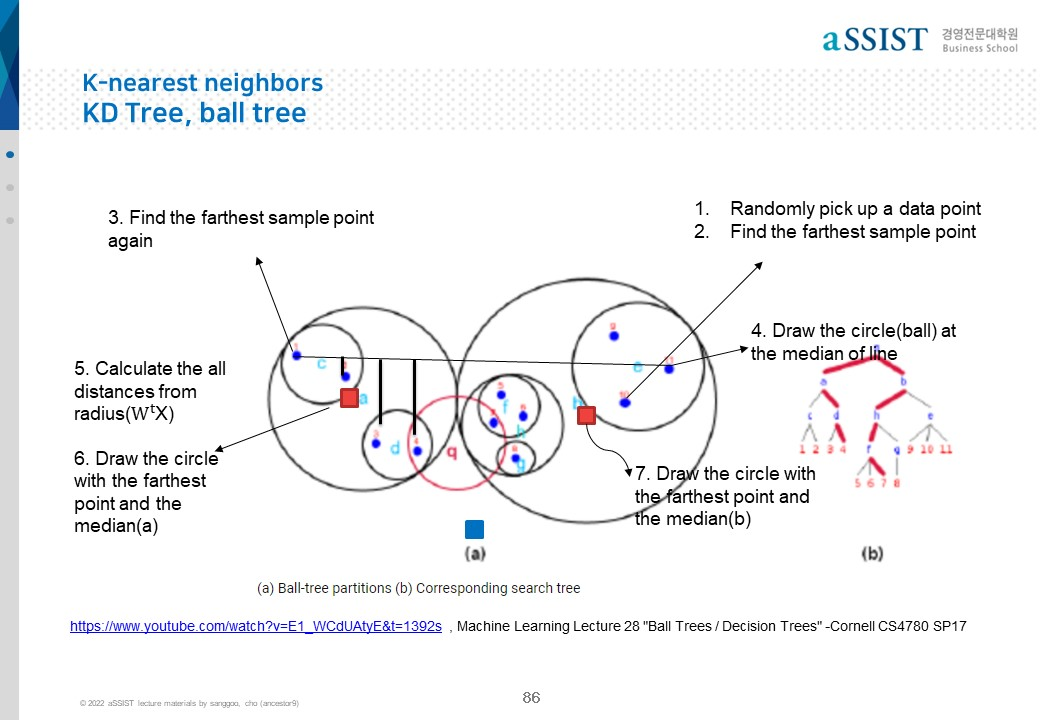

In [ ]:
Image(filename=dir_path + '/슬라이드86.jpg', width=width, height=height)

In [157]:
from sklearn import neighbors
neighbors.KNeighborsClassifier().get_params()
print('\n')
neighbors.NearestNeighbors().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

In [158]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
KNeighborsClassifier().get_params()
print('\n')
NearestNeighbors().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

#  KNN의 이해
### k-Nearest Neighbors and the Curse of Dimensionality

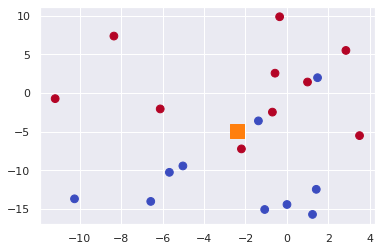

In [159]:
sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(20, 2, centers=2, random_state=2, cluster_std=5) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='coolwarm')
plt.scatter(X[:, 0].mean(), X[:, 1].mean(), color = '#ff7f0e', s=200, marker='s')

In [160]:
Xmean = np.array([X[:, 0].mean(), X[:, 1].mean()])
Xnew = Xmean[np.newaxis, :]

In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(1)

cross_val_score(model, X, y, cv=5)
print('\n')
model.fit(X, y).predict(Xnew)
y_predict = model.fit(X, y).predict(X)
print('\n')
print('정확도(Accuracy): {0:.2f}%'.format(accuracy_score(y, y_predict)*100))

array([0.5 , 0.75, 0.5 , 1.  , 0.75])

array([0])



정확도(Accuracy): 100.00%


In [162]:
model = KNeighborsClassifier(5)
                   
cross_val_score(model, X, y, cv=5)
print('\n')
model.fit(X, y).predict(Xnew)
y_predict = model.fit(X, y).predict(X)
print('\n')
print('정확도(Accuracy): {0:.2f}%'.format(accuracy_score(y, y_predict)*100))

array([1.  , 0.75, 0.5 , 1.  , 1.  ])

array([1])



정확도(Accuracy): 85.00%


### n_neighbors개수가 적을수로 Overfitting

KNeighborsClassifier(n_neighbors=1)

<Figure size 576x432 with 0 Axes>

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 1.0, '3-Class classification (k = 1)')

Text(0.5, 0, 'sepal length (cm)')

Text(0, 0.5, 'sepal width (cm)')

KNeighborsClassifier(n_neighbors=20)

<Figure size 576x432 with 0 Axes>

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 1.0, '3-Class classification (k = 20)')

Text(0.5, 0, 'sepal length (cm)')

Text(0, 0.5, 'sepal width (cm)')

KNeighborsClassifier(n_neighbors=50)

<Figure size 576x432 with 0 Axes>

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 1.0, '3-Class classification (k = 50)')

Text(0.5, 0, 'sepal length (cm)')

Text(0, 0.5, 'sepal width (cm)')

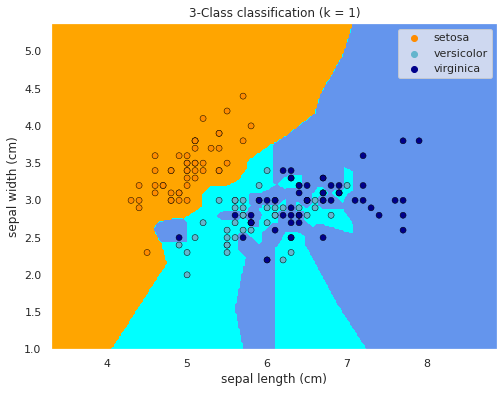

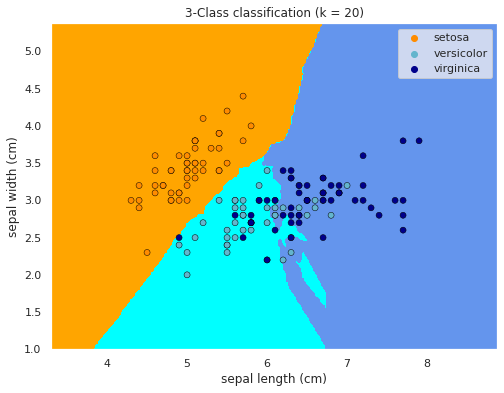

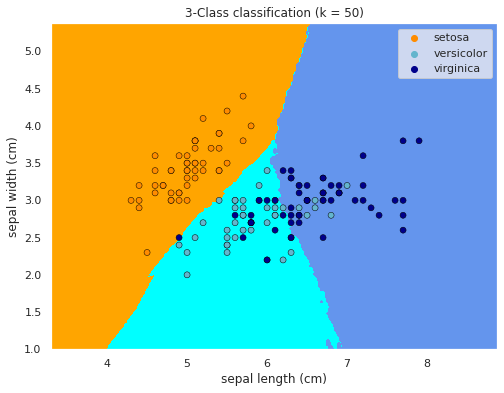

In [163]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for n_neighbors in [1, 20, 50]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (n_neighbors))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

k=1 인경우는 최근접이웃 분류기는 훈련 데이터를 기억하여 훈련 데이터에 대한 예측 오류가 0(100% 정확도), 즉 극단적 과적합(overfitting) 발생

### K가 클수록 과적합을 방지하게 되고 훈련데이터의 정확도는 떨어지지만 새로운 데이터에 대한 예측력은 높아지게 된다. 
- k의 개수는 hyperparameter 대상

# 이미지 인식 성능은 not good, KNN은 거리를 기준으로 분류하기에 차원의 저주 영향으로 고차원 데이터에는 적합하지 않음

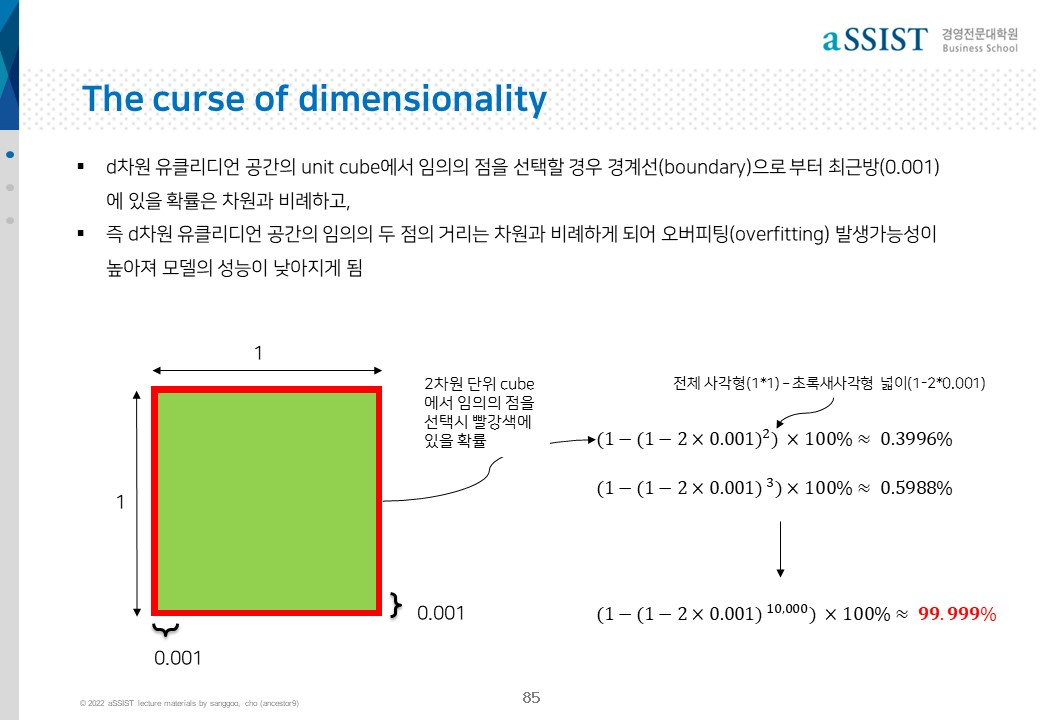

In [ ]:
Image(filename=dir_path + '/슬라이드85.jpg', width=width, height=height)

In [164]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

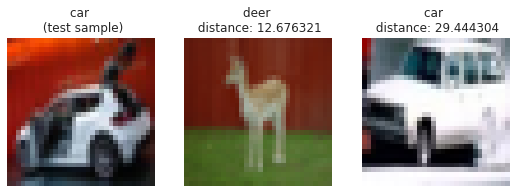

In [ ]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 3,1)

plt.imshow(X_test[6].astype('uint8'));
plt.title("%s \n (test sample)" % classes[y_test[6][0]]);
plt.axis('off');

plt.subplot(1,3,2)

plt.imshow(X_train[38805].astype('uint8'));
dist = np.linalg.norm(X_train[38805].ravel()*1.0/255-X_test[6].ravel()*1.0/255, ord=2)
plt.title("%s \n distance: %f" % (classes[y_train[38805][0]], dist));
plt.axis('off');

plt.subplot(1,3,3)

plt.imshow(X_train[32488].astype('uint8'));
dist = np.linalg.norm(X_train[32488].ravel()*1.0/255-X_test[6].ravel()*1.0/255, ord=2)
plt.title("%s \n distance: %f" % (classes[y_train[32488][0]], dist));
plt.axis('off');

## KNN과 차원의 저주(curse of dimensionality)
- 차원이 높아질수록 인스턴스간 거리는 점점 멀어지게 되어 거리로 구분하기 어려움
- 이미지데이터를 잘 구분 못하는 이유는 이미지는 차원이 높기 때문

##  1. K-Nearest Neighbors Classification
###  Step by Step Diabetes Classification-KNN-detailed
https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [165]:
from sklearn import datasets, neighbors, metrics
data = datasets.load_wine()
df = pd.DataFrame(data.data, columns= data.feature_names)
df['Outcome'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Outcome
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [166]:
from sklearn import model_selection, preprocessing, pipeline

X = df.drop(["Outcome"],axis = 1)
y = df.Outcome
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, random_state=11)

kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=11)

np.random.seed(111)
pipe = pipeline.make_pipeline(
    #preprocessing.StandardScaler(),
    neighbors.KNeighborsClassifier()
)

param_dist= {'kneighborsclassifier__n_neighbors' : list(range(5,50, 2)),
             'kneighborsclassifier__weights'  : ['uniform','distance'],
             'kneighborsclassifier__algorithm' : ['ball_tree', 'kd_tree'],
             'kneighborsclassifier__leaf_size'  : list(range(5,50, 3))}

In [167]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'kneighborsclassifier', 'kneighborsclassifier__algorithm', 'kneighborsclassifier__leaf_size', 'kneighborsclassifier__metric', 'kneighborsclassifier__metric_params', 'kneighborsclassifier__n_jobs', 'kneighborsclassifier__n_neighbors', 'kneighborsclassifier__p', 'kneighborsclassifier__weights'])

In [168]:
randomized = model_selection.RandomizedSearchCV(estimator= pipe, 
                                                param_distributions= param_dist, 
                                                cv=kf,
                                                n_iter=50, random_state=1357,
                                                scoring= 'recall_macro', verbose=True)
randomized.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=11, shuffle=True),
                   estimator=Pipeline(steps=[('kneighborsclassifier',
                                              KNeighborsClassifier())]),
                   n_iter=50,
                   param_distributions={'kneighborsclassifier__algorithm': ['ball_tree',
                                                                            'kd_tree'],
                                        'kneighborsclassifier__leaf_size': [5,
                                                                            8,
                                                                            11,
                                                                            14,
                                                                            17,
                                                                            20,
                                                                            23,
                    

In [169]:
print(f'optimal train score: {randomized.best_score_:.3f}') 
print(f'test score         : {randomized.score(X_test, y_test):.3f}')
print(f'optimal parameter  : {randomized.best_params_}')

optimal train score: 0.704
test score         : 0.725
optimal parameter  : {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__leaf_size': 23, 'kneighborsclassifier__algorithm': 'ball_tree'}


              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.75      0.64      0.69        14
           2       0.54      0.70      0.61        10

    accuracy                           0.72        36
   macro avg       0.73      0.73      0.72        36
weighted avg       0.74      0.72      0.73        36



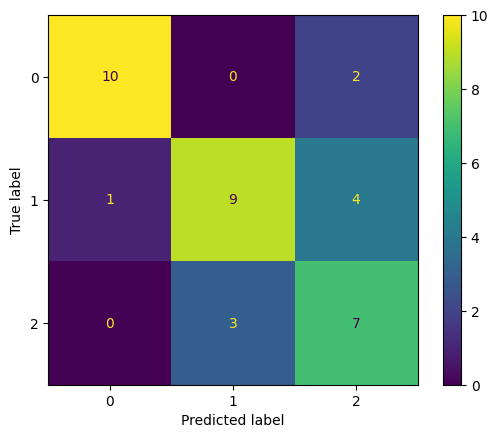

In [170]:
sns.reset_defaults()
metrics.plot_confusion_matrix(randomized, X_test, y_test)
y_pred = randomized.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

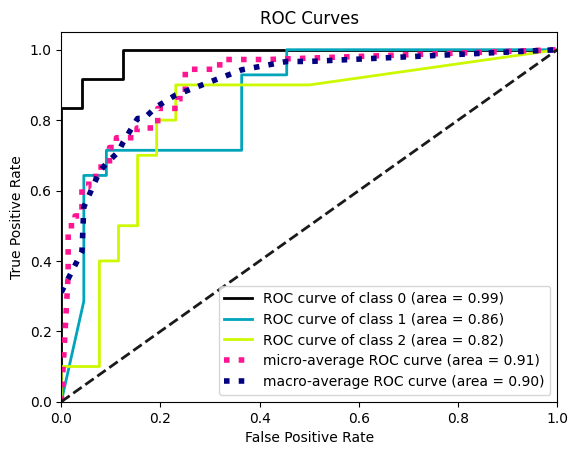

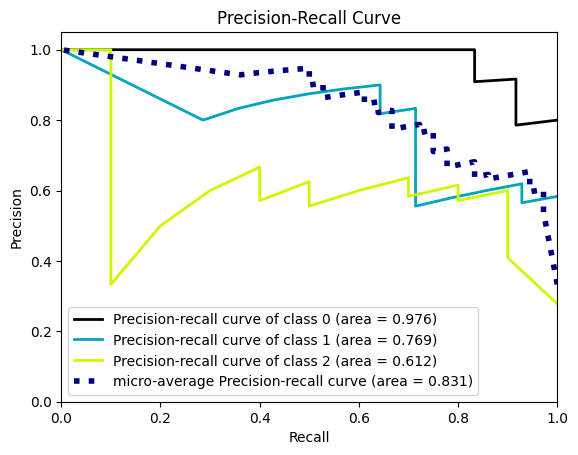

In [171]:
! pip install scikit-plot
import scikitplot as skplt 

y_probas = randomized.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_precision_recall(y_test, y_probas)

## 2.  KNN regressor

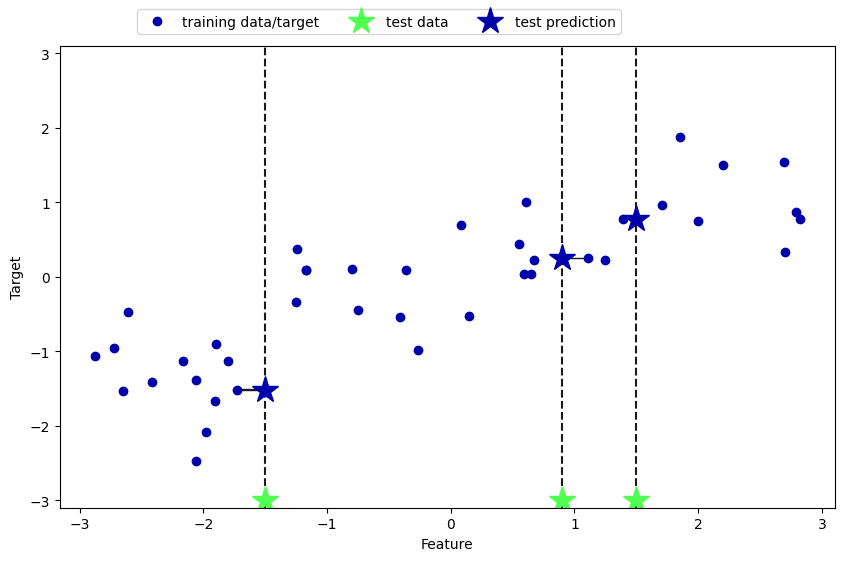

In [172]:
! pip install mglearn
import mglearn
mglearn.plot_knn_regression.plot_knn_regression()

<Figure size 2500x700 with 0 Axes>

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, 'KNeighborsRegressor k = 3')

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, 'KNeighborsRegressor k = 10')

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, 'KNeighborsRegressor k = 20')

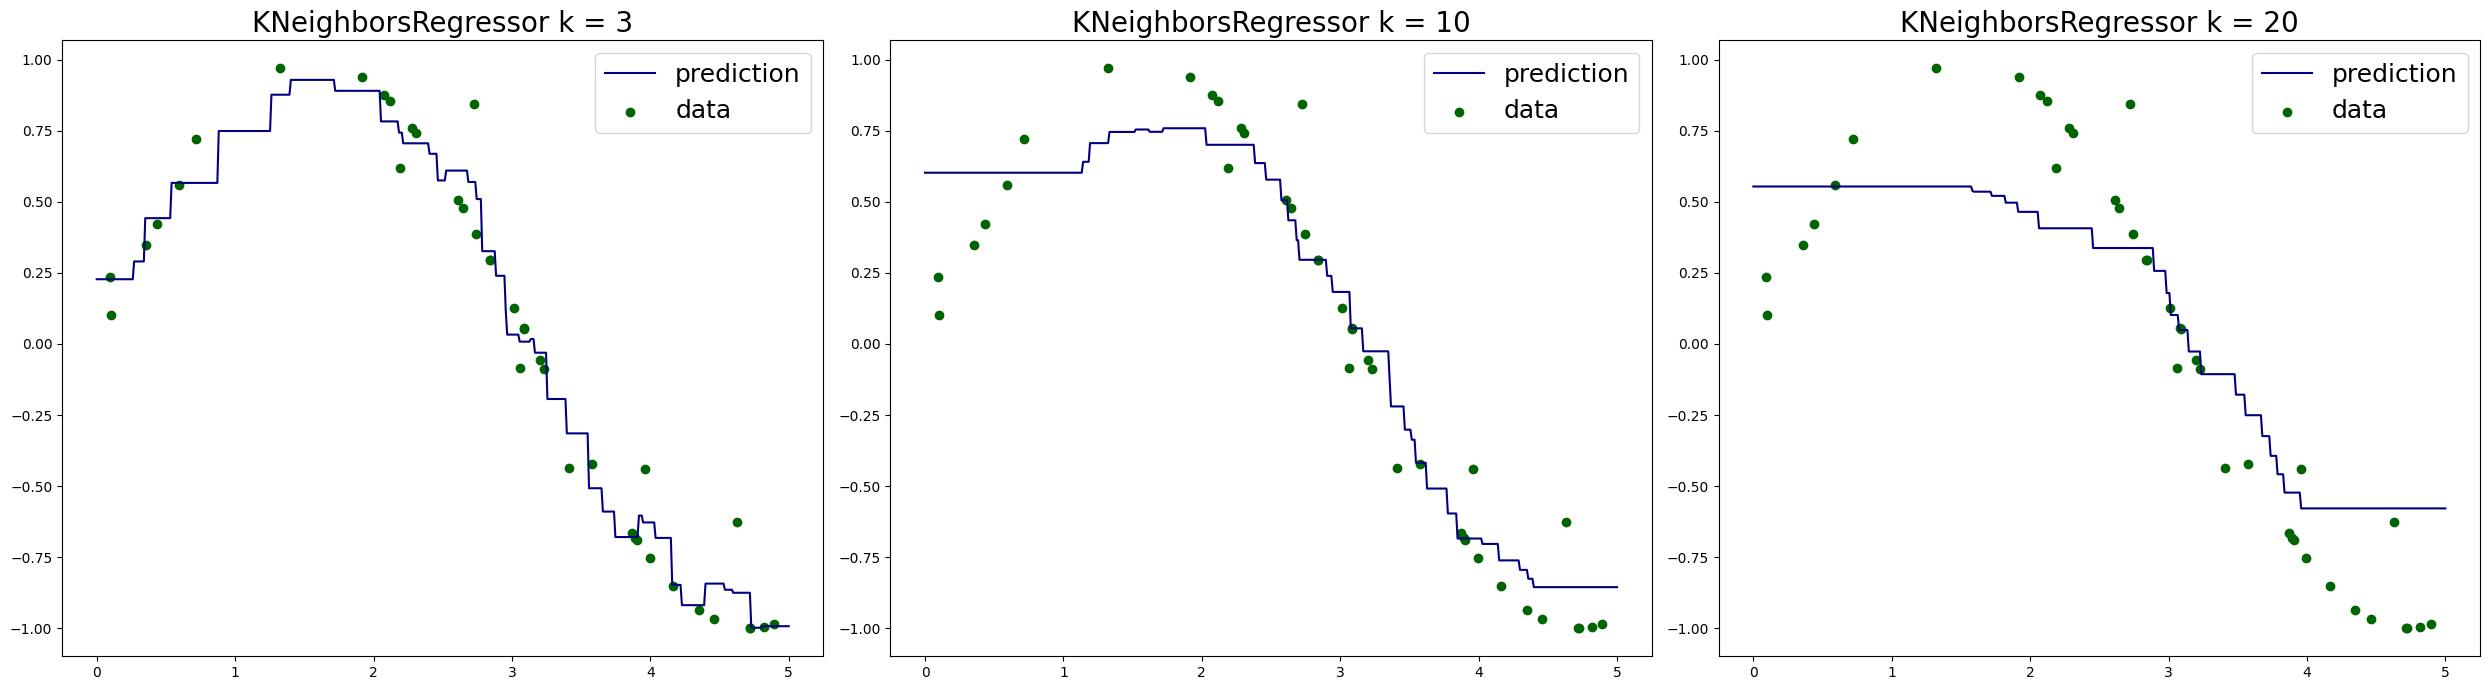

In [173]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8)) # noise 생성

plt.figure(figsize=(25, 7)) 
for i, neighbor in enumerate([3, 10, 20]):
    knn = neighbors.KNeighborsRegressor(n_neighbors=neighbor)
    y_ = knn.fit(X, y).predict(T)
    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='darkgreen', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend(fontsize='18')
    plt.title(f'KNeighborsRegressor k = {neighbor}',
             fontsize='20')
plt.tight_layout()
plt.show()


(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, "KNeighborsRegressor (k = 5, weights = 'uniform')")

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, "KNeighborsRegressor (k = 5, weights = 'distance')")

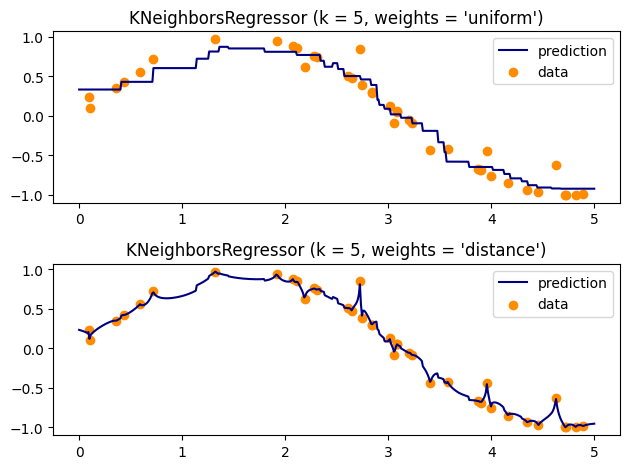

In [174]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

## 3. K-Nearest Neighbors as Umsupervised and anomaly detection
https://scikit-learn.org/stable/modules/neighbors.html

- 빨강 인스턴스는 Class B에 속하지만(k=3인 경우 최근접 이웃 3개 인스턴스와의 유클리디언 거리의 평균이 가장 크다) B그룹과 아주 멀리 있는 이웃으로 outlier라고 판정할 수있음

<img src='https://miro.medium.com/max/891/1*Z4pEsMtjy0svozfUx6haow.png'>

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

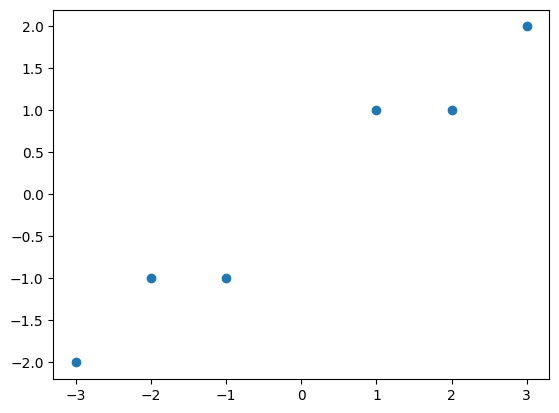

In [175]:
from sklearn.neighbors import NearestNeighbors
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X
plt.scatter(X[:, 0], X[:, 1])

In [176]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices # 각 인스턴스별로 자신을 포함하여 가장 가까운 인스턴스의 인덱스
print('\n')
distances # 각 인스턴스별로 자신을 포함하여 가장 가까운 인스턴스와의 거리

array([[0, 1, 2],
       [1, 0, 2],
       [2, 1, 0],
       [3, 4, 5],
       [4, 3, 5],
       [5, 4, 3]])

array([[0.        , 1.        , 2.23606798],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.41421356, 2.23606798],
       [0.        , 1.        , 2.23606798],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.41421356, 2.23606798]])

### 거리의 평균이 먼 인스턴스는 각 이웃에서 먼 outliers론 판정한다. n_neighbors의 개수와는 상관없음

In [177]:
distances.mean(1)

array([1.07868933, 0.80473785, 1.21676051, 1.07868933, 0.80473785,
       1.21676051])

In [178]:
nbrs.get_params()

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'radius': 1.0}

### a sparse graph showing the connections between neighboring points:

In [179]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

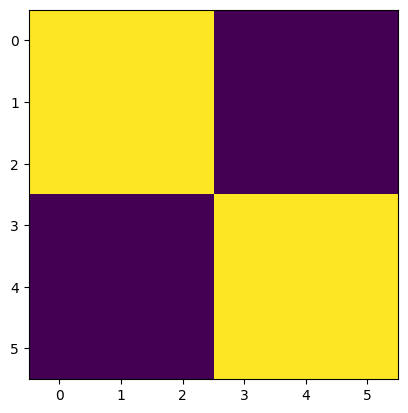

In [180]:
plt.imshow(nbrs.kneighbors_graph(X).toarray())

## practice

In [181]:
import pandas as pd
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Interquartile Range(IQR) - Box plot으로 outlier 탐색
- 단일 변수의 백분위수 (range)를 확인하여 이상치(outlier)를 그려보고 확인한다.
- 변수는 3개만

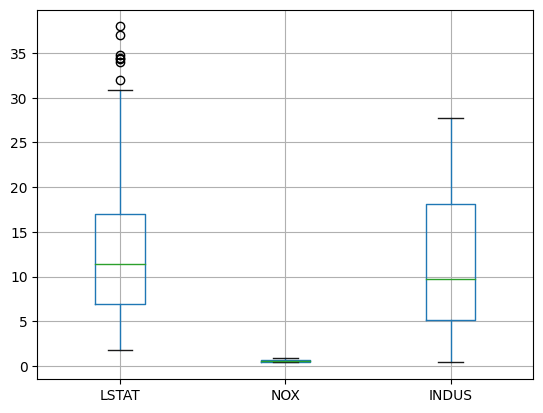

In [182]:
cols = ['LSTAT','NOX','INDUS']
boston.boxplot(column=cols)

In [183]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 3)
data = boston[cols]
nbrs.fit(data)

NearestNeighbors(n_neighbors=3)

In [ ]:
distances, indices = nbrs.kneighbors(data)

knn_summary = pd.DataFrame(np.hstack((data.values, 
                                      distances, 
                                      indices.astype(int))), 
                           columns = ['LSTAT', 'NOX', 'INDUS', 
                                      'dis-01', 'dis-02', 'dis-03', 
                                      'knn-0', 'knn-1', 'knn-2'])
knn_summary

,LSTAT,NOX,INDUS,dis-01,dis-02,dis-03,knn-0,knn-1,knn-2
0,4.98,0.538,2.31,0.0,0.155061,0.169115,0.0,298.0,179.0
1,9.14,0.469,7.07,0.0,0.440614,0.958303,1.0,44.0,236.0
2,4.03,0.469,7.07,0.0,0.673041,0.825918,2.0,277.0,41.0
3,2.94,0.458,2.18,0.0,0.230757,0.505327,3.0,202.0,204.0
4,5.33,0.458,2.18,0.0,0.120000,0.364040,4.0,5.0,355.0
...,...,...,...,...,...,...,...,...,...
501,9.67,0.573,11.93,0.0,0.590000,1.073963,501.0,502.0,79.0
502,9.08,0.573,11.93,0.0,0.590000,0.910437,502.0,501.0,79.0
503,5.64,0.573,11.93,0.0,0.840000,1.137717,503.0,504.0,72.0
504,6.48,0.573,11.93,0.0,0.840000,0.958382,504.0,503.0,74.0


### 인스턴스별로 가까운 최근접이웃 3개(KNN(n_neighbors=3))을 모두 '1'로 변환하여 시각화

In [184]:
pd.DataFrame(nbrs.kneighbors_graph(data).toarray())

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [185]:
pd.DataFrame(nbrs.kneighbors_graph(data).toarray()).loc[0, :].sum() # 최근접이웃이 3개

3.0

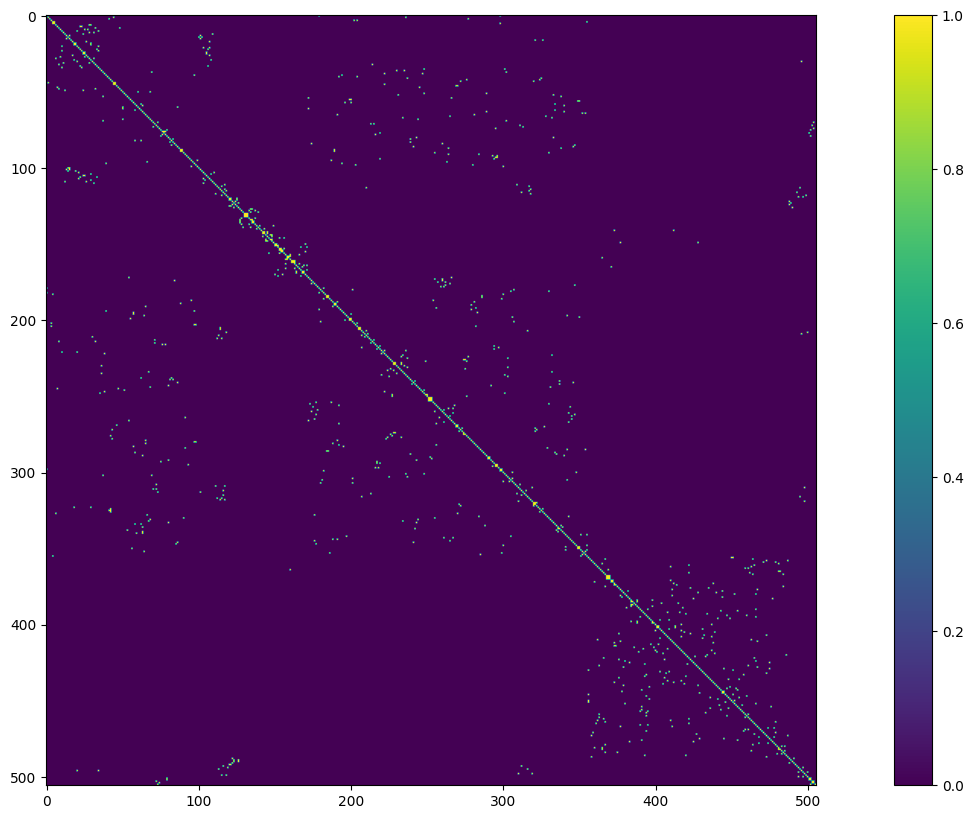

In [186]:
plt.figure(figsize=(20, 10))
plt.imshow(nbrs.kneighbors_graph(data).toarray())
plt.colorbar();

In [187]:
distances.mean(1)[:10]

array([1.07868933, 0.80473785, 1.21676051, 1.07868933, 0.80473785,
       1.21676051])

In [188]:
knn_summary['distance_mean'] = distances.mean(axis =1)
knn_summary

ValueError: ignored

### 최근접이웃과의 평균거리가 먼 인스턴스를 anomaly라고 판단할 수있다.

Text(0.5, 1.0, 'Distance mean of KNN')

Text(0.5, 0, 'Instances')

Text(0, 0.5, 'Mean of Distance')

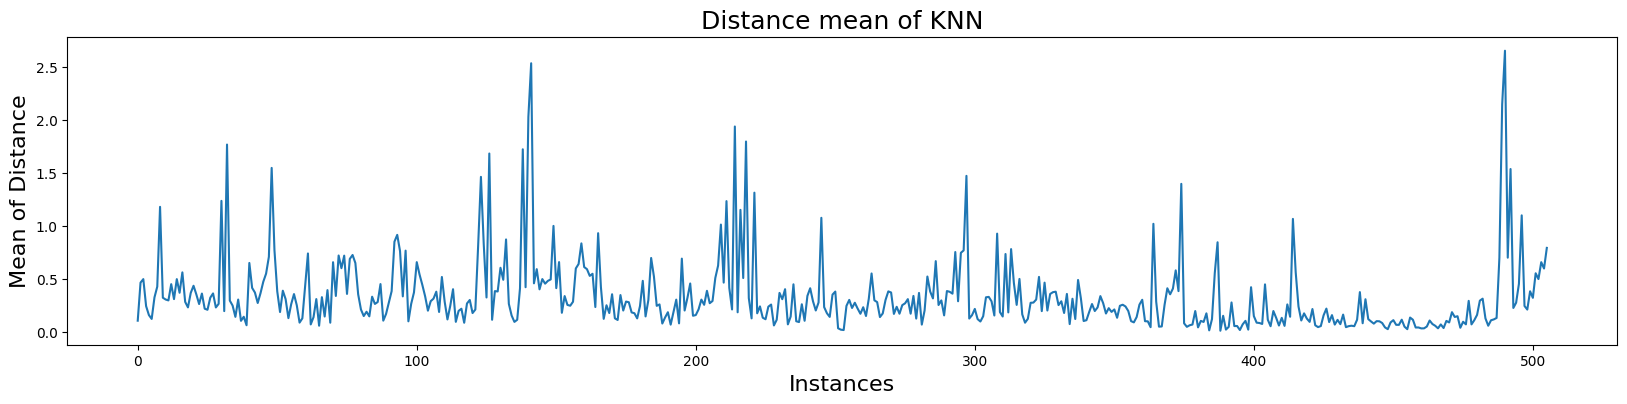

In [192]:
# plot mean of k-distances of each observation
knn_summary['distance_mean'].plot(figsize=(20,4))
plt.title('Distance mean of KNN', fontsize = 18)
plt.xlabel('Instances', fontsize = 16); plt.ylabel('Mean of Distance', fontsize = 16)

### Spike 되는 instance는 anomaly이며, 평균 거리가 '1.5'이상이면 이상치라고 판단

In [195]:
knn_summary.describe()
distances.mean

,LSTAT,NOX,INDUS,dis-01,dis-02,dis-03,knn-0,knn-1,knn-2,distance_mean,anomaly
count,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,12.653063,0.554695,11.136779,0.0,0.392354,0.625412,252.486166,248.932806,254.223320,0.339256,0.021739
std,7.141062,0.115878,6.860353,0.0,0.457824,0.617140,146.195017,147.321281,145.297862,0.345314,0.145975
min,1.730000,0.385000,0.460000,0.0,0.000000,0.030806,0.000000,0.000000,0.000000,0.013602,0.000000
25%,6.950000,0.449000,5.190000,0.0,0.125321,0.232391,126.250000,122.250000,125.000000,0.128692,0.000000
50%,11.360000,0.538000,9.690000,0.0,0.239320,0.476807,252.500000,255.500000,252.000000,0.256221,0.000000
75%,16.955000,0.624000,18.100000,0.0,0.464240,0.753448,378.750000,378.750000,376.000000,0.390249,0.000000
max,37.970000,0.871000,27.740000,0.0,3.790307,4.754133,505.000000,504.000000,504.000000,2.650611,1.000000


<function ndarray.mean>

In [196]:
outlier_index = np.where(knn_summary['distance_mean'] > 1.5)
outlier_index

(array([ 32,  48, 126, 138, 140, 141, 214, 218, 489, 490, 492]),)

In [197]:
knn_summary.iloc[outlier_index]

,LSTAT,NOX,INDUS,dis-01,dis-02,dis-03,knn-0,knn-1,knn-2,distance_mean,anomaly
32,27.71,0.538,8.14,0.0,2.236402,3.064392,32.0,8.0,214.0,1.766932,1
48,30.81,0.448,6.91,0.0,1.304521,3.336315,48.0,8.0,32.0,1.546946,1
126,27.26,0.581,25.65,0.0,1.850000,3.197700,126.0,123.0,490.0,1.682567,1
138,21.32,0.624,21.89,0.0,2.326802,2.840000,138.0,149.0,140.0,1.722267,1
140,24.16,0.624,21.89,0.0,2.840000,3.241097,140.0,138.0,143.0,2.027032,1
141,34.41,0.624,21.89,0.0,3.790307,3.807313,141.0,412.0,373.0,2.532540,1
214,29.55,0.489,10.59,0.0,2.746639,3.064392,214.0,8.0,32.0,1.937010,1
218,17.92,0.550,13.89,0.0,2.083283,3.303532,218.0,297.0,207.0,1.795605,1
489,23.97,0.609,27.74,0.0,2.538205,3.897818,489.0,123.0,126.0,2.145341,1
490,29.68,0.609,27.74,0.0,3.197700,4.754133,490.0,126.0,123.0,2.650611,1


### 3차원 그림으로 확인

In [198]:
knn_summary['anomaly'] = 0
knn_summary.loc[knn_summary['distance_mean'] > 1.5, 'anomaly'] = 1
knn_summary['anomaly'].value_counts()
knn_summary

0    495
1     11
Name: anomaly, dtype: int64

,LSTAT,NOX,INDUS,dis-01,dis-02,dis-03,knn-0,knn-1,knn-2,distance_mean,anomaly
0,4.98,0.538,2.31,0.0,0.155061,0.169115,0.0,298.0,179.0,0.108059,0
1,9.14,0.469,7.07,0.0,0.440614,0.958303,1.0,44.0,236.0,0.466306,0
2,4.03,0.469,7.07,0.0,0.673041,0.825918,2.0,277.0,41.0,0.499653,0
3,2.94,0.458,2.18,0.0,0.230757,0.505327,3.0,202.0,204.0,0.245362,0
4,5.33,0.458,2.18,0.0,0.120000,0.364040,4.0,5.0,355.0,0.161347,0
...,...,...,...,...,...,...,...,...,...,...,...
501,9.67,0.573,11.93,0.0,0.590000,1.073963,501.0,502.0,79.0,0.554654,0
502,9.08,0.573,11.93,0.0,0.590000,0.910437,502.0,501.0,79.0,0.500146,0
503,5.64,0.573,11.93,0.0,0.840000,1.137717,503.0,504.0,72.0,0.659239,0
504,6.48,0.573,11.93,0.0,0.840000,0.958382,504.0,503.0,74.0,0.599461,0


<Figure size 1000x1000 with 0 Axes>

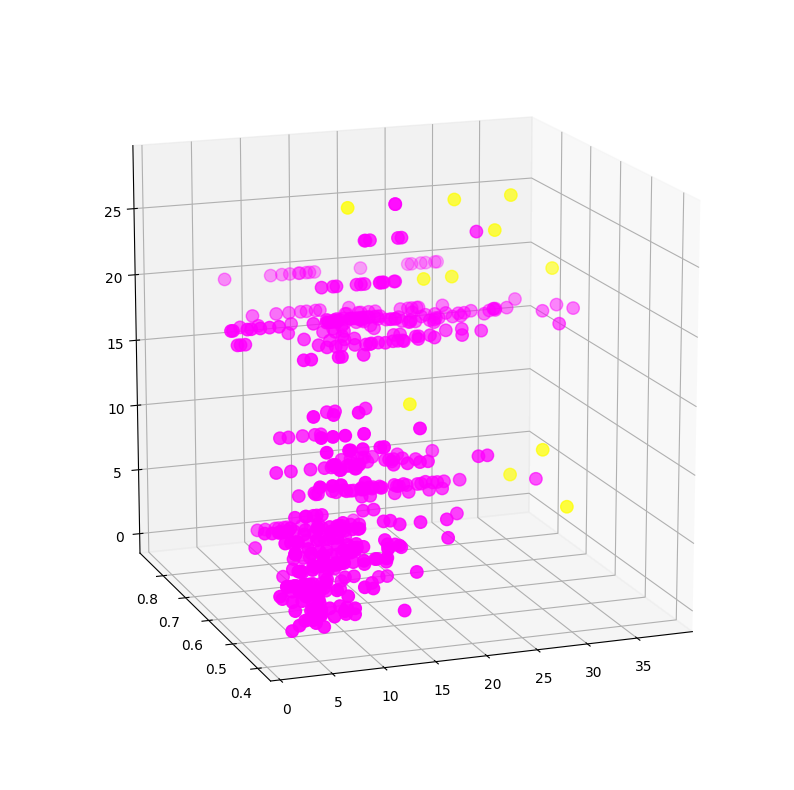

In [199]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(knn_summary['LSTAT'], knn_summary['NOX'], knn_summary['INDUS'], 
             c= knn_summary['anomaly'], s=80,
             cmap='spring')
ax.view_init(15, 250) 

# KNN Summary
- In principle, there are two important parameters to the KNeighbors classifier: <b>the number of neighbors and how you measure distance between data points</b>. 
- In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this book. By default, Euclidean distance is used, which works well in many settings.
- One of the strengths of k-NN is that the model is <b>very easy to understand</b>, and often gives <b>reasonable performance without a lot of adjustments</b>. Using this algorithm is a good baseline method to try before considering more advanced techniques. Building the nearest neighbors model is <b>usually very fast</b>, but when your training set is very large (either in number of features or in number of samples) prediction can be slow.
- When using the k-NN algorithm, <b>it’s important to preprocess your data. This approach often does not perform well on datasets with many features
(hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets)</b>.
- So, while the nearest k-neighbors algorithm is easy to understand, it is not often used
in practice, due to prediction being slow and its inability to handle many features.

# End

## KNN Imputer
Imputation for completing missing values using k-Nearest Neighbors.
Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [ ]:
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
X
print('\n')
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

[[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [ ]:
pd.DataFrame(X)

,0,1,2
0,1.0,2,NaN
1,3.0,4,3.0
2,NaN,6,5.0
3,8.0,8,7.0


# <font color='red'> **What is the meaning of 'Distance(거리)'?**

<img src='https://miro.medium.com/max/1313/1*5cEk6xVlZ7YSySMj2I45pg.png'  width=400 height=400>

<img src='https://goodboychan.github.io/images/cos_sim.png'>

## <font color='blue'> Multivariate gaussian distribution
### mahalanobis distance / normal distribution distance ?
- 두 독립변수의 분포는 정규분포이고 negative(y=0) 데이터가 800개, positive(y=1) 데이터 200개 
         * 첫번째 모집단 평균과 공분산
\begin{vmatrix}
-2 \\
-2
\end{vmatrix}
\begin{vmatrix}
1.0 & -0.9 & \\
-0.9 & 1
\end{vmatrix}
    
          * 두번째 모집단 평균과 공분산
\begin{vmatrix}
+2 \\
+2
\end{vmatrix}
\begin{vmatrix}
4 & -0.5 & \\
-0.5 & 3
\end{vmatrix}

#### 새로운 관측치 (-1, -1.2)는 양성과 음성중 어느 그룹에 속하는가?

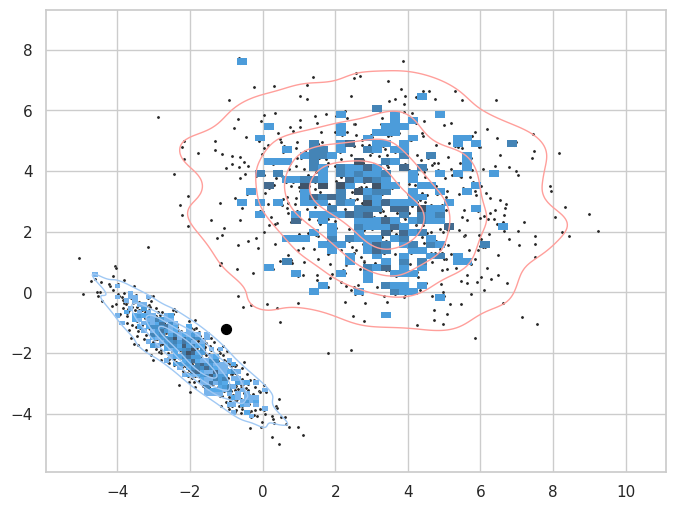

In [200]:
sns.set_theme(style="whitegrid", palette="pastel")
# Simulate data from two different bivariate Gaussian
n = 1000
# ------------------------Cluster A---------------------------------
mean = [-2, -2]
cov = [(1.0, -0.9), (-0.9, 1.0)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1)
sns.kdeplot(x=x, y=y, levels=5, color="b", linewidths=1)
# --------------------------Cluster B-------------------------------
mean = [3, 3]
cov = [(4.0, -0.5), (-0.5, 3.0)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1)
sns.kdeplot(x=x, y=y, levels=5, color="r", linewidths=1)

#--------------------------New neigbor belong to A or B--------------
plt.scatter(-1.0, -1.2, color='black', s= 50)

### Dynamic_time_warping matching
- https://en.wikipedia.org/wiki/Dynamic_time_warping

<img src='https://miro.medium.com/max/1313/1*90zWz-vJlrRyhgFzzOvFyg.png' width=400 height=400>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Two_repetitions_of_a_walking_sequence_of_an_individual_recorded_using_a_motion-capture_system.gif/600px-Two_repetitions_of_a_walking_sequence_of_an_individual_recorded_using_a_motion-capture_system.gif'>

# End